# Splines cúbicos

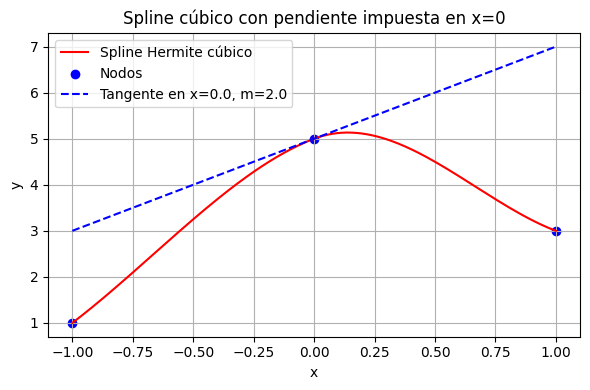

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicHermiteSpline

# --- Datos de los nodos ---
xs = np.array([-1.0, 0.0, 1.0])
ys = np.array([ 1.0, 5.0, 3.0])

# --- Pendiente deseada en el nodo central x=0 ---
m = 2.0   # Sustituye 2.0 por la pendiente que quieras

# --- Cálculo de derivadas en extremos por diferencias finitas ---
d0 = (ys[1] - ys[0]) / (xs[1] - xs[0])
d2 = (ys[2] - ys[1]) / (xs[2] - xs[1])

# Vector de derivadas hi de Hermite: [d0, m, d2]
ds = np.array([d0, m, d2])

# --- Construcción del spline cúbico de Hermite ---
spline = CubicHermiteSpline(xs, ys, ds)

# --- Evaluación para graficar ---
x_plot = np.linspace(xs[0], xs[-1], 200)
y_plot = spline(x_plot)

# --- Graficar ---
plt.figure(figsize=(6,4))
plt.plot(x_plot, y_plot, 'r-', label='Spline Hermite cúbico')
plt.scatter(xs, ys, color='blue', label='Nodos')

# Graficar tangente de pendiente m en el punto (0,5)
x1, y1 = xs[1], ys[1]
tangent = m * (x_plot - x1) + y1
plt.plot(x_plot, tangent, 'b--', label=f'Tangente en x={x1}, m={m}')

plt.title('Spline cúbico con pendiente impuesta en x=0')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


{a0: 1, a1: 5, b0: 15/2, b1: -3, c0: 0, c1: 3/2, d0: -7/2, d1: -1/2}


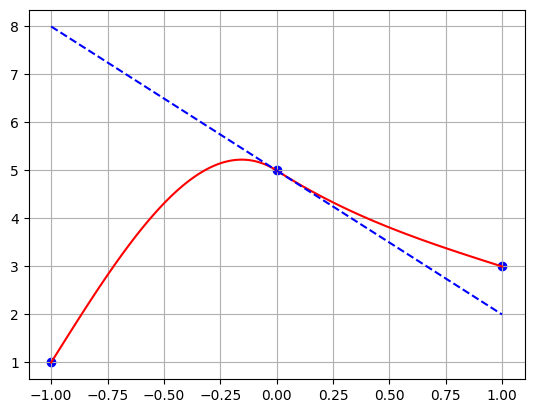

In [6]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# nodos y pendiente deseada
x0, x1, x2 = -1, 0, 1
y0, y1, y2 = 1, 5, 3
m = -3

x = sp.symbols('x')
a0,b0,c0,d0, a1,b1,c1,d1 = sp.symbols('a0 b0 c0 d0 a1 b1 c1 d1')

S0 = a0 + b0*(x-x0) + c0*(x-x0)**2 + d0*(x-x0)**3
S1 = a1 + b1*(x-x1) + c1*(x-x1)**2 + d1*(x-x1)**3

Sp0, Spp0 = sp.diff(S0,x), sp.diff(S0,x,2)
Sp1, Spp1 = sp.diff(S1,x), sp.diff(S1,x,2)

eqs = [
    S0.subs(x,x0)-y0,            # valores en -1
    S0.subs(x,x1)-y1,            # valores en 0 (tramo izq.)
    S1.subs(x,x1)-y1,            # valores en 0 (tramo der.)
    S1.subs(x,x2)-y2,            # valores en 1
    Sp0.subs(x,x1)-m,            # pendiente izq. = m
    Sp1.subs(x,x1)-m,            # pendiente der. = m
    Spp0.subs(x,x0),             # natural en -1
    Spp1.subs(x,x2)              # natural en 1
]

vars = [a0,b0,c0,d0,a1,b1,c1,d1]
sol  = sp.solve(eqs, vars, dict=True)[0]
print(sol)      # muestra coeficientes

# funciones numéricas para graficar
S0f = sp.lambdify(x, S0.subs(sol), 'numpy')
S1f = sp.lambdify(x, S1.subs(sol), 'numpy')

xx0 = np.linspace(x0, x1, 100)
xx1 = np.linspace(x1, x2, 100)

plt.plot(xx0, S0f(xx0), 'r')
plt.plot(xx1, S1f(xx1), 'r')
plt.scatter([x0,x1,x2],[y0,y1,y2], c='blue')
plt.plot(xx0, y1 + m*(xx0-x1), 'b--')
plt.plot(xx1, y1 + m*(xx1-x1), 'b--')
plt.grid(); plt.show()
